# Part 1 : Problem description and Data analysis

## Problem description

The problem we need to solve is to predict the sentiment polarity of a given sentence.  
The polarity can be either : 
- positive
- neutral
- negative


This problem can be interpreted as a 3 classes classification.  

To achieve that, we are given an annotated train dataaset containing 25k texts in different languages.  
The objective is to predict as accurately as possible the sentiment polarity of the test dataset.

## Data analysis

Before making any models, we need first to analyse our data in order to acquire some knowledge about it and how to handle better our problem.

### Loading the data

In [1]:
import os
import pandas as pd
import sys

In [2]:
sys.path.append("../")

In [3]:
DATA_PATH = "../data"

TRAIN_PATH = os.path.join(DATA_PATH ,"train.csv")
TEST_PATH = os.path.join(DATA_PATH ,"test.csv")

In [4]:
data_train = pd.read_csv(TRAIN_PATH)
data_test = pd.read_csv(TEST_PATH)

In [5]:
data_train

,content,sentiment
0,Не подошло.,negative
1,"товара нет, деньги вернул",negative
2,"[옵션]문풍지종류선택:3M실내용,규격선택:4. 대형",neutral
3,Kirain Alice rokoknya esse change wkwk,neutral
4,El hotel ideal para descansar y relajarte. El ...,positive
...,...,...
24995,I wish I had saved my money! My feet are prett...,negative
24996,Jalan Tol Bakal Dongkrak Transaksi Nontunai di...,neutral
24997,"jualan brg taik, barang mati kok di jual????????",positive
24998,"מזכ""ל האו""ם: על כל הצדדים להפגין איפוק מרבי בצ...",neutral


### Languages

The dataset is multilingal, so we are gonna analyse what languages are present in the dataset. To do that, let's use `langdetect`  
I've done a small python module that regroup diffrent functions to keep this notebook cleaner.

In [6]:
from utils.preprocessing import detect_languages

In [7]:
data_train, langages_detected = detect_languages(data_train)

  0%|          | 0/25000 [00:00<?, ?it/s]

In [8]:
languages_count = data_train["language"].value_counts()

In [9]:
import matplotlib.pyplot as plt
import numpy as np

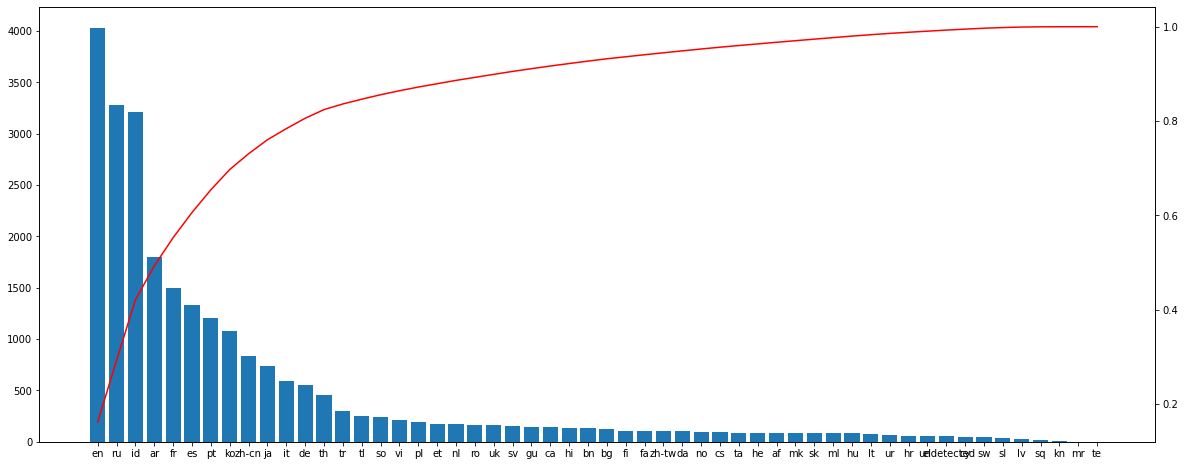

In [10]:
fig, ax1 = plt.subplots(figsize = (20, 8))
ax1.bar(languages_count.index, languages_count.values)
cumsum = np.cumsum(list(languages_count.values))
ax2 = ax1.twinx()
ax2.plot(cumsum/cumsum[-1],color = "red")
plt.show()

As we can see the languages are not equally represented in the dataset, we can see that more that 80°% of the data is represented by less than 20% of the languages.  
*Please note than langdetect is not 100% accurate and does misclassification, especiallly on very short texts*



The most common languages are the following :
- English
- Russian
- Indonesian
- Arabic
- French
- Spanish
- Portuguese
- Korean
- Chinese
- Japanese
- Italian
- German
- Thai
- ...

### Classes

Let's see if the distribution of classes is even

In [11]:
set(data_train.sentiment)

{'negative', 'neutral', 'positive', 'unassigned'}

In [12]:
data_train[data_train.sentiment=="unassigned"] # We'll consider this element as neutral

,content,sentiment,language
5657,ويلييي شو بتصرع💙💙,unassigned,fa


In [13]:
data_train.iloc[5657].sentiment="neutral"

<BarContainer object of 3 artists>

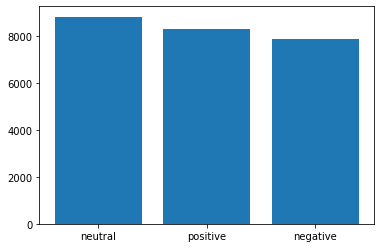

In [14]:
plt.figure()
plt.bar(data_train["sentiment"].value_counts().index, data_train["sentiment"].value_counts().values)

The repartition of the classes is pretty even, the classes are balanced

### Lengts of the sentenses

In [15]:
def compute_len_diagram():
    lenghts_positive = []
    lengths_negative = []
    length_neutral = []
    for sentence, sentiment in zip(data_train.content, data_train.sentiment):
        length = len(sentence.split(" "))
        if sentiment=="positive" : 
            lenghts_positive.append(length)
        elif sentiment=="negative":
            lengths_negative.append(length)
        else:
            length_neutral.append(length)
    
    return lenghts_positive, lengths_negative, length_neutral

In [16]:
positives, negatives, neutrals = compute_len_diagram()

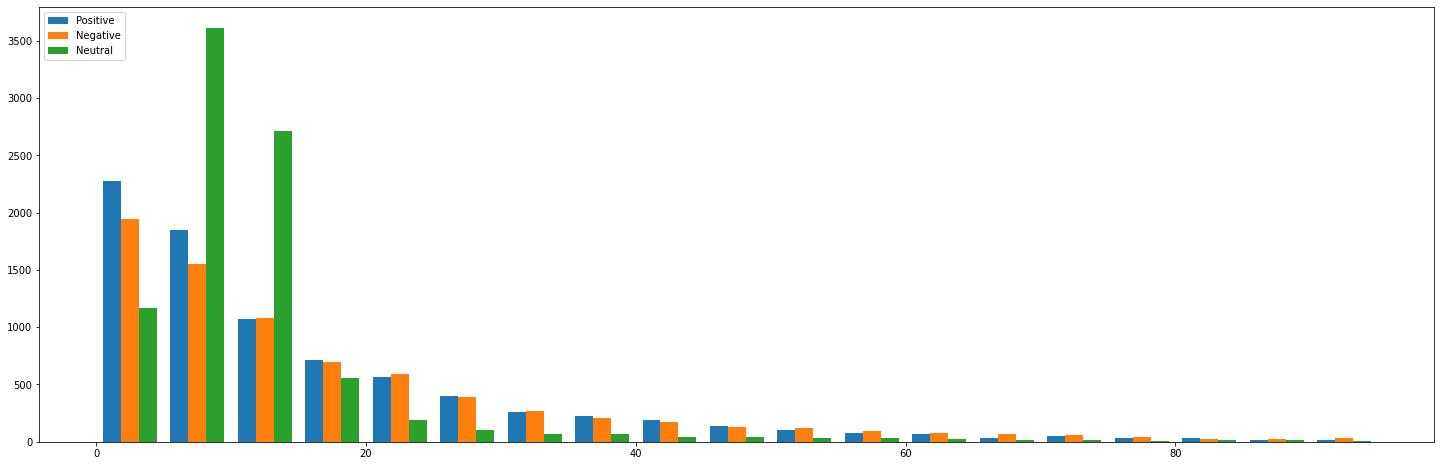

In [17]:
plt.figure(figsize=(25, 8))
plt.hist([positives, negatives, neutrals], bins = range(0, 100, 5), label=["Positive", "Negative", "Neutral"])
plt.legend(loc="upper left")
plt.show()

We can observe that very short texts are much more polaritized than the longer ones.  
Most of the texts contain less than 60 words, with this information we'll be able to choose the best `max_len` parameter for our tokenizeation